In [ ]:
import marineHeatWaves as mhw

In [ ]:
# Load required modules
import numpy as np
from datetime import date
from matplotlib import pyplot as plt
%matplotlib inline

In [265]:
# Generate time vector using datetime format (January 1 of year 1 is day 1)
t = np.arange(date(1982,1,1).toordinal(),date(2014,12,31).toordinal()+1)
dates = [date.fromordinal(tt.astype(int)) for tt in t]
# Generate synthetic temperature time series
sst = np.zeros(len(t))
sst[0] = 0 # Initial condition
a = 0.85 # autoregressive parameter
for i in range(1,len(t)):
    sst[i] = a*sst[i-1] + 0.75*np.random.randn() + 0.5*np.cos(t[i]*2*np.pi/365.25)
sst = sst - sst.min() + 5.

In [270]:
%%time
mhws, clim = mhw.detect(t, sst,smoothPercentile=False)

CPU times: user 173 ms, sys: 8 µs, total: 173 ms
Wall time: 172 ms


In [59]:
mhws['n_events']

58

In [ ]:
ev = np.argmax(mhws['intensity_max']) # Find largest event
print ('Maximum intensity:', mhws['intensity_max'][ev], 'deg. C')
print ('Average intensity:', mhws['intensity_mean'][ev], 'deg. C')
print ('Cumulative intensity:', mhws['intensity_cumulative'][ev], 'deg. C-days')
print ('Duration:', mhws['duration'][ev], 'days')
print ('Start date:', mhws['date_start'][ev].strftime("%d %B %Y"))
print ('End date:', mhws['date_end'][ev].strftime("%d %B %Y"))

In [60]:
np.where(t==mhws['time_start'][ev])[0][0]

6602

Text(0, 0.5, 'SST [$^\\circ$C]')

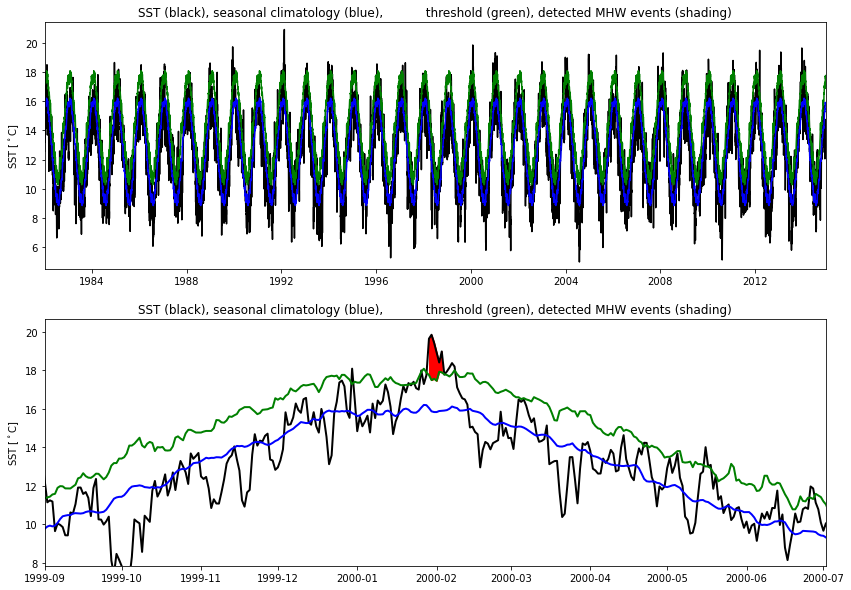

In [61]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
# Plot SST, seasonal cycle, and threshold
plt.plot(dates, sst, 'k-')
plt.plot(dates, clim['thresh'], 'g-')
plt.plot(dates, clim['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(dates[0], dates[-1])
plt.ylim(sst.min()-0.5, sst.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')
plt.subplot(2,1,2)
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev-10, ev+11, 1):
    t1 = np.where(t==mhws['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest and shade accordingly
t1 = np.where(t==mhws['time_start'][ev])[0][0]
t2 = np.where(t==mhws['time_end'][ev])[0][0]
plt.fill_between(dates[t1:t2+1], sst[t1:t2+1], clim['thresh'][t1:t2+1], \
                 color='r')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, sst, 'k-', linewidth=2)
plt.plot(dates, clim['thresh'], 'g-', linewidth=2)
plt.plot(dates, clim['seas'], 'b-', linewidth=2)
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(date.fromordinal(mhws['time_start'][ev]-150), date.fromordinal(mhws['time_end'][ev]+150))
plt.ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + 0.5)
plt.ylabel(r'SST [$^\circ$C]')

In [62]:
mhws['time_start'][ev]

730148

Text(0, 0.5, 'SST [$^\\circ$C]')

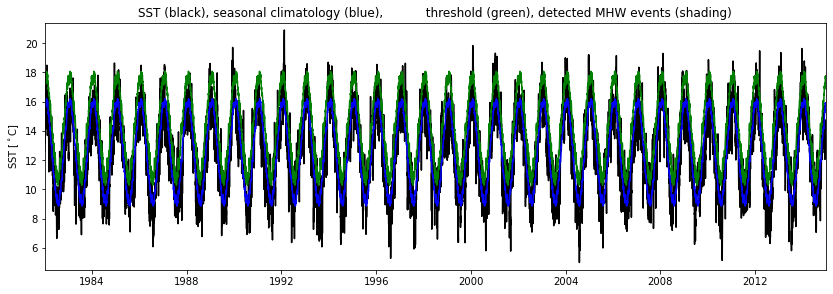

In [63]:
plt.figure(figsize=(14,10))
plt.subplot(2,1,1)
# Plot SST, seasonal cycle, and threshold
plt.plot(dates, sst, 'k-')
plt.plot(dates, clim['thresh'], 'g-')
plt.plot(dates, clim['seas'], 'b-')
plt.title('SST (black), seasonal climatology (blue), \
          threshold (green), detected MHW events (shading)')
plt.xlim(dates[0], dates[-1])
plt.ylim(sst.min()-0.5, sst.max()+0.5)
plt.ylabel(r'SST [$^\circ$C]')

In [64]:
import xarray as xr

In [130]:
temp.set_index(TIME=['day','year']).unstack()

<xarray.DataArray (day: 366, year: 33)>
array([[12.56483004, 12.57093317, 14.26880484, ..., 14.46939914,
        16.1613989 , 16.06208069],
       [13.867423  , 12.0773515 , 14.37166865, ..., 13.80146598,
        15.96504382, 15.14912056],
       [13.25410507, 12.34890165, 14.55004339, ..., 14.19941283,
        17.65850964, 15.04698311],
       ...,
       [13.43523379, 15.44511925, 16.67766135, ..., 15.22878586,
        16.67359384, 13.97803174],
       [13.23934766, 14.82976032, 15.04601588, ..., 15.3529694 ,
        14.8685268 , 14.1752495 ],
       [        nan,         nan, 15.39035805, ..., 14.55521279,
                nan,         nan]])
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 ... 359 360 361 362 363 364 365 366
  * year     (year) int64 1982 1983 1984 1985 1986 ... 2010 2011 2012 2013 2014

In [120]:
temp.year

KeyError: 'day'

In [231]:
temp.coords['year']=temp.TIME.dt.year
temp.coords['day']=temp.TIME.dt.dayofyear


In [106]:
xr.merge([ x[1] for x in temp.groupby('day')])


ValueError: unable to convert unnamed DataArray to a Dataset without providing an explicit name

NameError: name 'x' is not defined

In [109]:
t1=[ x[1] for x in temp.groupby('day')]

In [112]:
t1[0]

<xarray.DataArray (TIME: 33)>
array([12.56483004, 12.57093317, 14.26880484, 15.36272661, 14.90303057,
       15.93851794, 15.24585218, 14.08086015, 16.6524372 , 17.00739034,
       17.55236673, 16.36536443, 16.59279571, 16.16992964, 15.55422286,
       15.28115992, 15.87683459, 12.07520376, 14.83577467, 17.4803276 ,
       16.32568253, 18.68259846, 17.34912096, 16.46148712, 15.08585908,
       17.36187828, 14.86622682, 15.86892137, 14.06222329, 15.62210241,
       14.46939914, 16.1613989 , 16.06208069])
Coordinates:
  * TIME     (TIME) datetime64[ns] 1982-01-01 1983-01-01 ... 2014-01-01
    year     (TIME) int64 1982 1983 1984 1985 1986 ... 2010 2011 2012 2013 2014
    day      (TIME) int64 1 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [229]:

temproll = temp.rolling(TIME=20, center=True).mean()
seas_climYear =temproll.groupby('TIME.dayofyear').mean().pad(dayofyear=31, mode='wrap').rolling(dayofyear=31, center=True).mean()
thresh_climYear = temp.groupby('TIME.dayofyear').quantile(0.90).pad(dayofyear=31, mode='wrap').rolling(dayofyear=31, center=True).mean()
seas_climYear =seas_climYear[31:-31]
thresh_climYear= thresh_climYear[31:-31]

In [29]:
import pandas as pd

In [30]:
dx = pd.date_range("2012-02-20", "2012-03-01", freq="d")
dx.dayofyear

Int64Index([51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61], dtype='int64')

(8.138831791886275, 22.46388164055095)

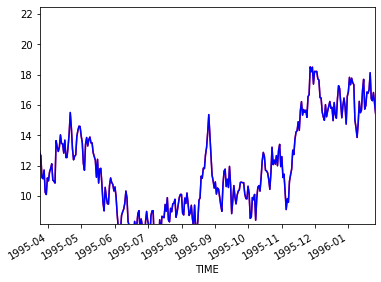

In [31]:
temp.plot(color='red')
plt.plot(dates, sst, 'b-')
plt.xlim(date.fromordinal(mhws['time_start'][ev]-150), date.fromordinal(mhws['time_end'][ev]+150))
plt.ylim(clim['seas'].min() - 1, clim['seas'].max() + mhws['intensity_max'][ev] + 0.5)

In [214]:
def print_data(item,axis):
    print(item)
    return np.nanmean(item.ravel())[0]

In [1]:
%%time
vfunc = np.vectorize(lambda x:np.datetime64(x))

temp = xr.DataArray(sst,dims=['TIME'],coords={'TIME':vfunc(dates)})

temp.coords['year']=temp.TIME.dt.year
temp.coords['day']=temp.TIME.dt.dayofyear

t1 =temp.set_index(TIME=['day','year']).unstack().pad(day=31, mode='wrap').rolling(day=11,min_periods=1,center=True).construct("window_dim")
xclim =t1.reduce(np.nanmean,dim=('year','window_dim'))[31:-31]
xtresh = t1.reduce(np.nanpercentile,dim=('year','window_dim'), q=90)[31:-31]


NameError: name 'np' is not defined

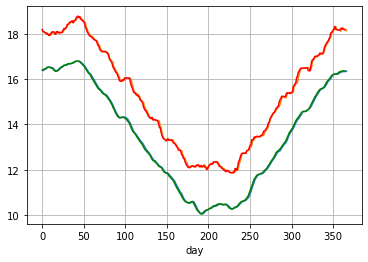

In [271]:
xclim.plot()
xtresh.plot()
plt.plot(range(0,365), clim['seas'][0:365], 'g-')
plt.plot(range(0,365), clim['thresh'][0:365], 'r-')

plt.grid(True)


In [243]:
t[0:20]

<xarray.DataArray (day: 20)>
array([17.80659422, 17.81653106, 17.82776746, 17.82326663, 17.83645986,
       17.85095604, 17.86577942, 17.87018993, 17.88309073, 17.89785433,
       17.92672428, 17.95934597, 17.98105273, 17.99070277, 18.01113152,
       18.00564812, 17.98282076, 17.94290582, 17.91173487, 17.89175565])
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20

In [150]:
g = []
def big_mean(item,axis):
    print (item.shape)
    g=item
    re

temp.set_index(TIME=['day','year']).unstack().rolling(day=11,min_periods=1,center=True).


(366, 33, 11)


NameError: name 're' is not defined

In [149]:
g

[]

(0.0, 50.0)

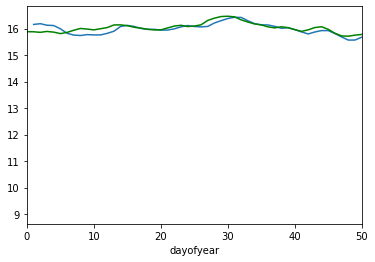

In [54]:
rolltemp =temp.rolling(TIME=3,min_periods=11,center=True).mean()
leaps =rolltemp[temp.TIME.dt.is_leap_year].groupby('TIME.dayofyear').mean()
normal =rolltemp[~rolltemp.TIME.dt.is_leap_year].groupby('TIME.dayofyear').mean()
normal['dayofyear']=np.hstack((normal.dayofyear[0:59],normal.dayofyear[59:]+1))
mormal =normal.interp(dayofyear=range(1,367))
xclim =xr.concat((normal,leaps),dim='dayofyear').groupby('dayofyear').mean() #.pad(dayofyear=31, mode='wrap').rolling(dayofyear=1, center=True).mean()
xclim.plot()
#xclim.plot()
plt.plot(range(0,365), clim['seas'][0:365], 'g-')
plt.xlim(0,50)

In [51]:
xclim[31:-31].dayofyear.values

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [328]:
normal.groupby('TIME.dayofyear').count()

KeyError: 'TIME'

In [244]:
temp.groupby('TIME.dayofyear')

DataArrayGroupBy, grouped over 'dayofyear' 
366 groups with labels 1, 2, 3, 4, 5, ..., 363, 364, 365, 366.

In [7]:

plt.plot(dates, sst, 'k-', linewidth=2)
temp.plot()

NameError: name 'dates' is not defined

KeyError: 'thresh'

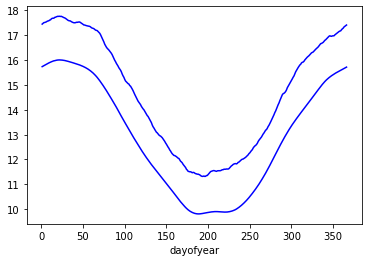

In [365]:
#seas_climYear.plot()
thresh_climYear.plot(color='blue')
seas_climYear.plot(color='blue')
plt.plot(range(0,365), clim['thresh'][0:365], 'g-')
plt.plot(range(0,365), clim['seas'][0:365], 'g-')

In [148]:
seas_climYear

<xarray.DataArray (dayofyear: 366)>
array([15.93141652, 15.94112073, 15.93894468, 15.944796  , 15.95637797,
       15.96914709, 15.97161931, 15.97408251, 15.990878  , 16.0010222 ,
       16.01133875, 16.02095414, 16.04243016, 16.05359784, 16.06643578,
       16.06512689, 16.07313905, 16.07710948, 16.07190908, 16.07620317,
       16.08829441, 16.09777454, 16.10633735, 16.10445124, 16.10355722,
       16.10154347, 16.09368101, 16.08787061, 16.08124746, 16.07489096,
       16.07224214, 16.06912368, 16.05714102, 16.05513836, 16.0405584 ,
       16.01600321, 15.98927544, 15.97445876, 15.9503864 , 15.91255274,
       15.87699902, 15.84344422, 15.81894548, 15.79586425, 15.7755637 ,
       15.75546978, 15.72982909, 15.71195667, 15.69296828, 15.67101252,
       15.63974758, 15.60250302, 15.56220999, 15.5302046 , 15.50880033,
       15.48875371, 15.46155944, 15.43793469, 15.40867492, 15.37488415,
       15.34124966, 15.30184095, 15.25501305, 15.21647185, 15.17793275,
       15.137763  , 15.1014407 , 15.06306665, 15.01621106, 14.97602563,
       14.93753373, 14.90440759, 14.86309637, 14.81829235, 14.75784571,
       14.70430919, 14.64580765, 14.5895126 , 14.53793007, 14.49708029,
       14.4613361 , 14.42097958, 14.38645035, 14.34784182, 14.30065051,
       14.24887558, 14.19068344, 14.13296328, 14.07997602, 14.02045   ,
       13.96278978, 13.90465255, 13.85027396, 13.79911092, 13.74190574,
       13.68398868, 13.6370964 , 13.58368995, 13.52799583, 13.47462963,
...
       11.78007907, 11.8394449 , 11.88662955, 11.94097697, 11.99710273,
       12.05211221, 12.10867966, 12.16622573, 12.2284005 , 12.29633254,
       12.35867186, 12.4142279 , 12.466763  , 12.51941215, 12.57376555,
       12.61814911, 12.65433663, 12.68056084, 12.7123947 , 12.74323365,
       12.77113014, 12.80528369, 12.83295611, 12.86313436, 12.89733452,
       12.93818801, 12.97216408, 13.0068728 , 13.06221998, 13.12875429,
       13.1947466 , 13.26192742, 13.32471849, 13.38990501, 13.44222901,
       13.49981395, 13.56057752, 13.62495904, 13.68588841, 13.72866643,
       13.77289782, 13.8212137 , 13.87401256, 13.92023705, 13.97691033,
       14.02959693, 14.08057846, 14.13655667, 14.20371816, 14.2643307 ,
       14.32018042, 14.37868236, 14.43457618, 14.49983255, 14.56227477,
       14.61624812, 14.65795216, 14.71092866, 14.76364463, 14.81092215,
       14.84307439, 14.8805607 , 14.92287914, 14.96579732, 15.01101478,
       15.06173086, 15.10733205, 15.14388495, 15.18233984, 15.22308274,
       15.27598216, 15.32784795, 15.37104521, 15.41376554, 15.45593991,
       15.49025707, 15.5157026 , 15.54961542, 15.57727305, 15.59695935,
       15.63659408, 15.66593481, 15.6996171 , 15.7293555 , 15.75438273,
       15.77627072, 15.79394141, 15.82042217, 15.83684745, 15.85761888,
       15.87395821, 15.89652578, 15.91214693, 15.92368504, 15.92567808,
       15.91924406])
Coordinates:
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 360 361 362 363 364 365 366

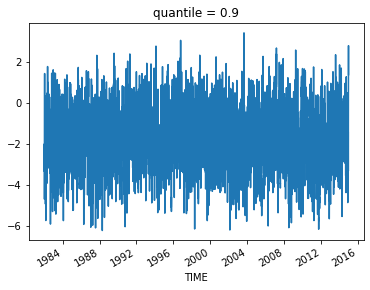

In [253]:
(temp.groupby('TIME.dayofyear')-thresh_climYear)

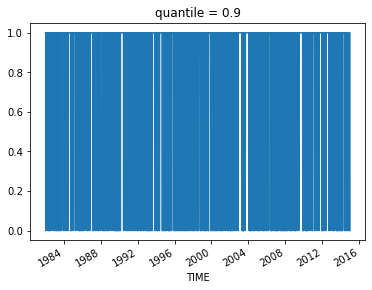

In [255]:
maxGap=2

events =((temp.groupby('TIME.dayofyear')-thresh_climYear)>0).ffill('TIME',limit=maxGap)
events

In [167]:
import scipy.ndimage as ndimage

In [168]:
events, n_events = ndimage.label(events)

In [169]:
events.plot()

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

In [170]:
n_events

459